In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

# from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from ast import literal_eval

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model, roc_results
from lob_data_utils.svm_calculation import lob_svm
import os


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data_length = 10000
rs_params = [(0.1, 1.0), (1.0, 0.1), (1.0, 1.0), (0.1, 0.1)]
stocks = list(roc_results.result_cv_10000.keys())
data_dir = 'res_mlp_pca_gdf_que_prev10_split'

In [3]:
def get_mean_scores(scores: dict) -> dict:
    mean_scores = {}
    for k, v in scores.items():
        mean_scores[k] = np.mean(v)
    return mean_scores

def get_score_for_clf(clf, df_test):
    x_test = df_test[['queue_imbalance']]
    y_test = df_test['mid_price_indicator'].values
    return model.test_model(clf, x_test, y_test)

def get_logistic_regression(stock, data_length):
    df, df_test = lob.load_prepared_data(
        stock, data_dir='../gaussian_filter/data', cv=False, length=data_length)
    clf = LogisticRegression()
    train_x = df[['queue_imbalance']]

    scores = model.validate_model(clf, train_x, df['mid_price_indicator'], folds=2)
    res = {
        **get_mean_scores(scores),
        'stock': stock,
        'kernel': 'logistic',
    }
    test_scores = get_score_for_clf(clf, df_test)
    return {**res, **test_scores}

In [4]:
df_res = pd.DataFrame()
for stock in stocks:
    for r, s in rs_params:
    #pd.read_csv('svm_features_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s))
        filename = data_dir + '/mlp_pca_gdf_split_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s)
        if os.path.exists(filename):
            df_temp = pd.read_csv(filename)
            df_temp['r'] = [r] * len(df_temp)
            df_temp['s'] = [s] * len(df_temp)
            df_res = df_res.append(df_temp)
#df_res.drop(columns=['Unnamed: 0'], inplace=True)
columns = ['f1', 'features', 'kappa',
           'matthews', 'roc_auc', 'stock',
       'test_f1', 'test_kappa', 'test_matthews', 'test_roc_auc', 'r', 's']
df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)

,f1,features,kappa,matthews,roc_auc,stock,test_f1,test_kappa,test_matthews,test_roc_auc,r,s
6,0.605912,pca_gdf_que_prev_split10,0.191436,0.193631,0.595517,11946,0.624469,0.202095,0.202235,0.600896,0.1,0.1
24,0.588838,pca_gdf_que_prev_split10,0.174490,0.175877,0.587533,3879,0.574879,0.120233,0.120723,0.560168,1.0,0.1
6,0.573227,pca_gdf_que_prev_split10,0.172150,0.174343,0.586356,7858,0.499705,0.142778,0.146420,0.570707,0.1,1.0
16,0.598406,pca_gdf_que_prev_split10,0.167950,0.169270,0.583978,3035,0.580948,0.104046,0.104374,0.551914,0.1,1.0
12,0.602803,pca_gdf_que_prev_split10,0.160313,0.165593,0.580179,1472,0.642857,0.130737,0.134935,0.564263,0.1,0.1
2,0.618376,pca_gdf_que_prev_split10,0.164059,0.165458,0.581830,4320,0.628675,0.171828,0.172916,0.585431,1.0,0.1
21,0.624797,pca_gdf_que_prev_split10,0.160603,0.163188,0.579781,10484,0.589368,0.107682,0.110570,0.554118,0.1,1.0
21,0.595437,pca_gdf_que_prev_split10,0.157350,0.158735,0.578852,9761,0.622085,0.137749,0.142264,0.568660,1.0,1.0
15,0.547595,pca_gdf_que_prev_split10,0.155990,0.158551,0.578259,4799,0.575576,0.153528,0.154238,0.577115,0.1,1.0
18,0.601740,pca_gdf_que_prev_split10,0.153248,0.157319,0.576624,12417,0.608899,0.166132,0.168322,0.583233,0.1,1.0


In [5]:
log_res = []
for stock in stocks:
    log_res.append(get_logistic_regression(stock, data_length))
df_log_res = pd.DataFrame(log_res)
df_log_res['stock'] = df_log_res['stock'].values.astype(np.int)
df_log_res.index = df_log_res['stock'].values.astype(np.int)

In [6]:
df_gdf_best = df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)
df_gdf_best['stock'] = df_gdf_best['stock'].values.astype(np.int)
df_gdf_best.index = df_gdf_best['stock'].values.astype(np.int)

In [7]:
df_all = pd.merge(df_gdf_best, df_log_res, on='stock', suffixes=['_svm', '_log'])

In [8]:
df_all.columns

Index(['f1_svm', 'features', 'kappa_svm', 'matthews_svm', 'roc_auc_svm',
       'stock', 'test_f1_svm', 'test_kappa_svm', 'test_matthews_svm',
       'test_roc_auc_svm', 'r', 's', 'f1_log', 'kappa_log', 'kernel',
       'matthews_log', 'precision', 'recall', 'roc_auc_log', 'test_f1_log',
       'test_kappa_log', 'test_matthews_log', 'test_precision', 'test_recall',
       'test_roc_auc_log', 'train_f1', 'train_kappa', 'train_matthews',
       'train_precision', 'train_recall', 'train_roc_auc'],
      dtype='object')

In [9]:
all_columns = ['matthews_svm', 'matthews_log',  'test_matthews_svm','test_matthews_log', 
       'roc_auc_svm', 'roc_auc_log', 'test_roc_auc_svm',  'test_roc_auc_log', 'stock' ]
df_all[all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.193631,0.195228,0.202235,0.207584,0.595517,0.597678,0.600896,0.603555,11946
1,0.175877,0.156645,0.120723,0.109705,0.587533,0.577662,0.560168,0.554478,3879
2,0.174343,0.153560,0.146420,0.171398,0.586356,0.576792,0.570707,0.584732,7858
3,0.169270,0.180586,0.104374,0.097073,0.583978,0.590223,0.551914,0.548374,3035
4,0.165593,0.144501,0.134935,0.123164,0.580179,0.570231,0.564263,0.557401,1472
5,0.165458,0.186482,0.172916,0.154918,0.581830,0.592922,0.585431,0.577343,4320
6,0.163188,0.176488,0.110570,0.110441,0.579781,0.588278,0.554118,0.555225,10484
7,0.158735,0.179309,0.142264,0.134666,0.578852,0.589699,0.568660,0.566471,9761
8,0.158551,0.158099,0.154238,0.139722,0.578259,0.578773,0.577115,0.567181,4799
9,0.157319,0.140348,0.168322,0.149033,0.576624,0.569520,0.583233,0.573501,12417


In [10]:
df_all['matthews_diff'] = df_all['matthews_svm'] -  df_all['matthews_log']
df_all['matthews_test_diff'] = df_all['test_matthews_svm'] - df_all['test_matthews_log']

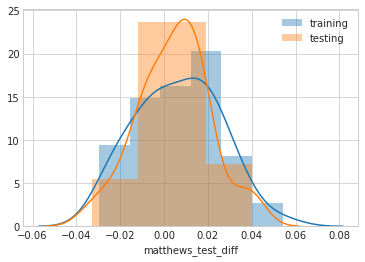

In [11]:
sns.distplot(df_all['matthews_diff'], label='training')
sns.distplot(df_all['matthews_test_diff'], label='testing')
plt.legend()

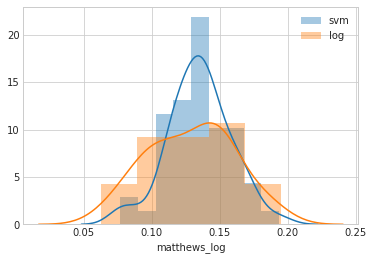

In [12]:
sns.distplot(df_all['matthews_svm'], label='svm')
sns.distplot(df_all['matthews_log'], label='log')
plt.legend()

In [13]:
df_all['matthews_diff'].median(), df_all['matthews_test_diff'].median()

(0.007187873803395445, 0.005857745027855299)

In [14]:
df_all['matthews_diff'].mean(), df_all['matthews_test_diff'].mean()

(0.006247017224443121, 0.0045899504190124885)

In [15]:
len(df_all[df_all['matthews_svm'] > df_all['matthews_log']][all_columns]), len(df_all[df_all['test_matthews_svm'] > df_all['test_matthews_log']]), len(df_all)

(31, 34, 53)

In [16]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.193631,0.195228,0.202235,0.207584,0.595517,0.597678,0.600896,0.603555,11946
2,0.174343,0.153560,0.146420,0.171398,0.586356,0.576792,0.570707,0.584732,7858
10,0.155037,0.139191,0.128397,0.132541,0.575172,0.569601,0.563534,0.565751,1956
11,0.149675,0.156086,0.141185,0.143297,0.574205,0.577835,0.570505,0.571621,11869
14,0.146893,0.133289,0.106465,0.117822,0.573142,0.566207,0.552848,0.558221,13061
17,0.142168,0.148160,0.076135,0.079752,0.568149,0.570485,0.534629,0.533714,13003
18,0.141770,0.154666,0.113261,0.123602,0.569842,0.576290,0.554756,0.558992,8080
19,0.141683,0.155253,0.133712,0.142525,0.570432,0.577556,0.566658,0.571199,5836
20,0.140573,0.155153,0.140481,0.146313,0.568414,0.577888,0.567881,0.572998,1907
22,0.136968,0.101616,0.101936,0.133375,0.568200,0.550800,0.550932,0.566706,9086


In [17]:
len(df_all[df_all['roc_auc_svm'] > df_all['roc_auc_log']][all_columns]), len(df_all[df_all['test_roc_auc_svm'] > df_all['test_roc_auc_log']][all_columns]), len(df_all)

(29, 34, 53)

In [18]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.193631,0.195228,0.202235,0.207584,0.595517,0.597678,0.600896,0.603555,11946
2,0.174343,0.153560,0.146420,0.171398,0.586356,0.576792,0.570707,0.584732,7858
10,0.155037,0.139191,0.128397,0.132541,0.575172,0.569601,0.563534,0.565751,1956
11,0.149675,0.156086,0.141185,0.143297,0.574205,0.577835,0.570505,0.571621,11869
14,0.146893,0.133289,0.106465,0.117822,0.573142,0.566207,0.552848,0.558221,13061
17,0.142168,0.148160,0.076135,0.079752,0.568149,0.570485,0.534629,0.533714,13003
18,0.141770,0.154666,0.113261,0.123602,0.569842,0.576290,0.554756,0.558992,8080
19,0.141683,0.155253,0.133712,0.142525,0.570432,0.577556,0.566658,0.571199,5836
20,0.140573,0.155153,0.140481,0.146313,0.568414,0.577888,0.567881,0.572998,1907
22,0.136968,0.101616,0.101936,0.133375,0.568200,0.550800,0.550932,0.566706,9086


In [19]:
df_all[df_all['test_roc_auc_svm'] < df_all['test_roc_auc_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.193631,0.195228,0.202235,0.207584,0.595517,0.597678,0.600896,0.603555,11946
2,0.174343,0.153560,0.146420,0.171398,0.586356,0.576792,0.570707,0.584732,7858
6,0.163188,0.176488,0.110570,0.110441,0.579781,0.588278,0.554118,0.555225,10484
10,0.155037,0.139191,0.128397,0.132541,0.575172,0.569601,0.563534,0.565751,1956
11,0.149675,0.156086,0.141185,0.143297,0.574205,0.577835,0.570505,0.571621,11869
14,0.146893,0.133289,0.106465,0.117822,0.573142,0.566207,0.552848,0.558221,13061
18,0.141770,0.154666,0.113261,0.123602,0.569842,0.576290,0.554756,0.558992,8080
19,0.141683,0.155253,0.133712,0.142525,0.570432,0.577556,0.566658,0.571199,5836
20,0.140573,0.155153,0.140481,0.146313,0.568414,0.577888,0.567881,0.572998,1907
22,0.136968,0.101616,0.101936,0.133375,0.568200,0.550800,0.550932,0.566706,9086
